In [169]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler


nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/adriel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/adriel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [84]:
import numpy as np
import pandas as pd
import scipy
import sklearn

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("SciPy version:", scipy.__version__)
print("Scikit-learn version:", sklearn.__version__)

NumPy version: 1.26.4
Pandas version: 2.2.3
SciPy version: 1.13.1
Scikit-learn version: 1.5.1


In [119]:
df_todos = pd.read_csv("data/ObterProposicoes_2013_2024.csv")
df_current = pd.read_csv("data/proposicoes_2013-2024_final_pres_cam.csv")

In [109]:
df_todos.columns

Index(['nomeProposicao', 'idProposicao', 'idProposicaoPrincipal',
       'nomeProposicaoOrigem', 'tipoProposicao', 'tema', 'Ementa',
       'ExplicacaoEmenta', 'Autor', 'ideCadastro', 'ufAutor', 'partidoAutor',
       'DataApresentacao', 'RegimeTramitacao', 'UltimoDespacho', 'Apreciacao',
       'Indexacao', 'Situacao', 'LinkInteiroTeor', 'apensadas',
       'apensadas_proposicao'],
      dtype='object')

In [120]:
# Ensure both columns are aligned and have the same labels
df_filtered = df_todos[df_todos.nomeProposicao.isin(df_current.nomeProposicao)].drop_duplicates(subset=["nomeProposicao"])
df_current = df_current.merge(df_filtered[['nomeProposicao', 'Ementa']], on='nomeProposicao', how='left')

In [122]:
colunas = [col for col in df_current.columns if col != 'VirouLei'] + ['VirouLei']
df_current = df_current.reindex(columns=colunas)

In [123]:
df_current

,nomeProposicao,idProposicao,partidoAutor,DataApresentacao,Ano,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição,Partido_Pres_Cam,PPC_igual_partidoAutor,Ementa,VirouLei
0,PL 4926/2013,564574,PR,2013-02-04,2013,0,1,0,0,0,0.077973,1,0,PMDB,0,"Proibe a fabricação, venda e utilização de and...",0
1,PL 4931/2013,564595,PR,2013-02-04,2013,1,1,0,0,1,0.024691,1,0,PMDB,0,"Altera a Lei nº 10.257, de 10 de julho de 2001...",0
2,PL 4928/2013,564579,PSB,2013-02-04,2013,0,1,0,0,0,0.025341,1,0,PMDB,0,Denomina LUIZ GONZAGA DO NASCIMENTO - O REI DO...,0
3,PL 4936/2013,564610,PR,2013-02-05,2013,0,0,0,1,0,0.148148,1,0,PMDB,0,"Altera o inciso IV do art. 5º da Lei nº 7.827,...",0
4,PL 4937/2013,564611,PSD,2013-02-05,2013,0,0,0,1,0,0.033138,1,0,PMDB,0,"Altera a Lei nº 10.711, de 5 de agosto de 2003...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7956,PL 3027/2024,2450707,PT,2024-08-02,2024,0,0,0,1,1,0.097466,1,0,PP,0,Institui o Programa de Desenvolvimento do Hidr...,1
7957,PL 3117/2024,2452037,PT,2024-08-13,2024,1,0,0,0,0,0.083821,1,0,PP,0,Dispõe sobre medidas excepcionais para a aquis...,1
7958,PL 3148/2024,2452628,PSB,2024-08-13,2024,0,1,0,0,0,0.132554,1,0,PP,0,Inscreve o nome de Eduardo Campos no Livro dos...,1
7959,PL 3266/2024,2454377,UNIÃO,2024-08-21,2024,0,1,0,1,0,0.011696,1,0,PP,0,Dispõe sobre o reconhecimento da fibromialgia ...,0


In [124]:
colunas = df_current.columns.tolist()
X = df_current[colunas[5:-1]]
y = df_current[colunas[-1]]

undersample = RandomUnderSampler()
X_resampled, y_resampled = undersample.fit_resample(X, y)

In [126]:
X_resampled

,Administração e Políticas Públicas,Desenvolvimento Social e Urbano,Direitos e Justiça,Economia e Desenvolvimento Sustentável,Infraestrutura e Gestão de Recursos,Influencia,Aliado,Oposição,Partido_Pres_Cam,PPC_igual_partidoAutor,Ementa
7429,0,1,1,1,0,0.081871,1,0,PP,0,"Altera o art. 4º da Lei 12.651, de 25 de maio ..."
5159,0,0,1,0,0,0.082192,1,0,DEM,0,"Altera a Lei nº 7.210, de 11 de julho de 1984,..."
755,1,0,0,0,0,0.148148,0,1,PMDB,0,"Altera o Decreto-Lei nº 667/69, que Reorganiza..."
4845,0,0,0,1,0,0.041096,1,0,DEM,0,"Altera a Lei nº 4.502, de 30 de novembro de 19..."
2291,0,1,0,0,0,0.066277,1,0,PMDB,1,Altera o tipo penal do artigo 305 da Lei nº 9....
...,...,...,...,...,...,...,...,...,...,...,...
7955,1,0,1,1,0,0.132554,1,0,PP,0,Dispõe sobre a criação do Fundo de Investiment...
7956,0,0,0,1,1,0.097466,1,0,PP,0,Institui o Programa de Desenvolvimento do Hidr...
7957,1,0,0,0,0,0.083821,1,0,PP,0,Dispõe sobre medidas excepcionais para a aquis...
7958,0,1,0,0,0,0.132554,1,0,PP,0,Inscreve o nome de Eduardo Campos no Livro dos...


In [148]:
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()
    
    text = re.sub(r'nº|\b\d+\b|º', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Remover pontuação
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenizar o texto
    tokens = word_tokenize(text)
    
    # Remover stopwords
    stop_words = set(stopwords.words('portuguese'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

In [149]:
ementas = df_current.Ementa

ementas_tokenizadas = [preprocess_text(ementa) for ementa in ementas]

# Mostrar os tokens de cada ementa
for idx, tokens in enumerate(ementas_tokenizadas):
    print(f"Ementa {idx+1}: {tokens}")

Ementa 1: ['proibe', 'fabricação', 'venda', 'utilização', 'andador', 'infantil', 'todo', 'território', 'nacional']
Ementa 2: ['altera', 'lei', 'julho', 'lei', 'janeiro', 'estabelecendo', 'requisitos', 'aplicação', 'recursos', 'públicos', 'pavimentação', 'vias', 'urbanas', 'rodovias']
Ementa 3: ['denomina', 'luiz', 'gonzaga', 'nascimento', 'rei', 'baião', 'canal', 'transposição', 'águas', 'rio', 'francisco', 'semiárido', 'nordestino']
Ementa 4: ['altera', 'inciso', 'iv', 'art', 'lei', 'setembro']
Ementa 5: ['altera', 'lei', 'agosto', 'isentar', 'cultivares', 'plantas', 'flores', 'ornamentais', 'domínio', 'público', 'obrigatoriedade', 'inscrição', 'registro', 'nacional', 'cultivares']
Ementa 6: ['acrescenta', 'parágrafo', 'art', 'altera', 'redação', 'inciso', 'iii', 'art', 'lei', 'julho', 'trata', 'fundo', 'financiamento', 'estudantil', 'fies', 'instituir', 'opção', 'fundo', 'aval', 'garantia', 'financiamentos']
Ementa 7: ['institui', 'conselho', 'gestão', 'fiscal', 'responsabilidade', '

In [150]:
vectorizer = TfidfVectorizer(max_features=500)  # max_features limita o número de palavras (dimensões) no vetor

# Join the tokenized words back into a single string for each document
ementas_joined = [' '.join(tokens) for tokens in ementas_tokenizadas]

X = vectorizer.fit_transform(ementas_joined)

# Converter para um array para fácil visualização
X_array = X.toarray()

print("Forma dos dados vetorizados:", X_array.shape)
print("Vetor TF-IDF da primeira ementa:\n", X_array[0])



Forma dos dados vetorizados: (7961, 500)
Vetor TF-IDF da primeira ementa:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

In [151]:
X_array.shape

(7961, 500)

In [147]:
df_current.shape

(7961, 17)

In [158]:
df_current['Ementa_Vectors'] = X_array

In [160]:
print(df_current.head())

  nomeProposicao  idProposicao partidoAutor DataApresentacao   Ano  \
0   PL 4926/2013        564574           PR       2013-02-04  2013   
1   PL 4931/2013        564595           PR       2013-02-04  2013   
2   PL 4928/2013        564579          PSB       2013-02-04  2013   
3   PL 4936/2013        564610           PR       2013-02-05  2013   
4   PL 4937/2013        564611          PSD       2013-02-05  2013   

   Administração e Políticas Públicas  Desenvolvimento Social e Urbano  \
0                                   0                                1   
1                                   1                                1   
2                                   0                                1   
3                                   0                                0   
4                                   0                                0   

   Direitos e Justiça  Economia e Desenvolvimento Sustentável  \
0                   0                                       0   
1   

In [161]:
# Convert 'Ementa_Vectors' column to a list
#df_current['Ementa_Vectors'] = df_current['Ementa_Vectors'].apply(lambda x: list(x))

# Save the DataFrame to a CSV file
# Salvar o DataFrame como Pickle
#df_current.to_pickle("data/proposicoes_2013-2024_final.pkl")


In [171]:
import pickle
with open('ementas.pkl', 'wb') as f:
    pickle.dump(X_array, f)

In [141]:
y = df_current['VirouLei']

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduzir a dimensionalidade do X_array para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_array)

# Plotar os dados reduzidos para 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', s=100)
plt.legends(*scatter.legend_elements(), title='Virou Lei')
plt.title('Representação 2D das Ementas (TF-IDF com PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x767e7753a160>
Traceback (most recent call last):
  File "/home/adriel/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/home/adriel/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/home/adriel/anaconda3/lib/python3.11/site-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/adriel/anaconda3/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: /home/adriel/anaconda3/l

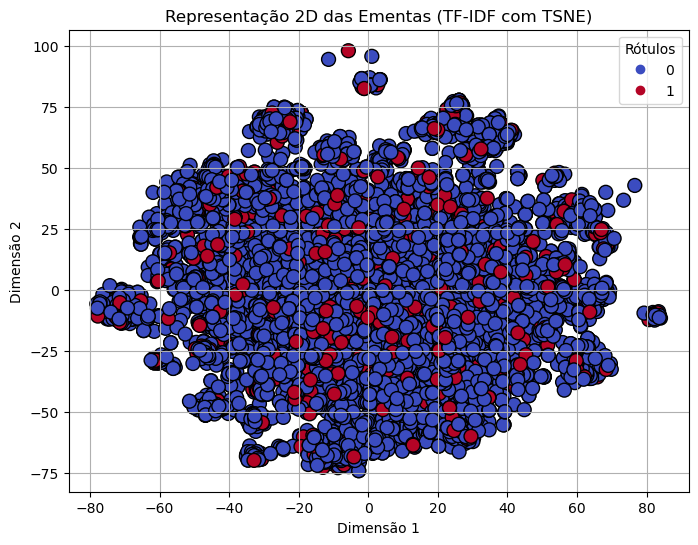

In [100]:
from sklearn.manifold import TSNE

# Reduzir a dimensionalidade com TSNE para 2 dimensões
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_array)

# Criar o gráfico, associando rótulos às cores
plt.figure(figsize=(8, 6))

# Plotar os pontos com cores diferentes para cada classe
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=100)

# Adicionar legenda com rótulos (1 e 0, por exemplo)
plt.legend(*scatter.legend_elements(), title="Rótulos")

# Adicionar título e labels
plt.title('Representação 2D das Ementas (TF-IDF com TSNE)')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.grid(True)
plt.show()
